In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#數據、矩陣處理套件numpy
import numpy as np
#繪圖處理套件matplotlib
import matplotlib.pyplot as plt
#繪圖處理套件顯示中文matplotlib.font_manage
#產生亂數的套件
import random
#控制輸出的套件(動畫使用)
from IPython import display

In [ ]:
import matplotlib.font_manager as plt_font
import matplotlib.colors as mcolors
font=plt_font.FontProperties(fname="/content/drive/MyDrive/kaiu.ttf")
folder = "/content/drive/MyDrive/線性衰減/線性圖形/"

In [ ]:
All_Log = []
for i in range(1,11):
  dir = f"/content/drive/MyDrive/線性衰減/線性{i}/Log-5000.npy"
  Log_item = np.load(dir, allow_pickle=True).item()
  All_Log.append(Log_item)

## 顏色設定
參考顏色(見 [matplotlib 官網](https://matplotlib.org/stable/gallery/color/named_colors.html))：
![CSS Color](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_00x.png)

In [ ]:
cdict = mcolors.CSS4_COLORS
# print(cdict)

# 這版顏色很舒服，但看起來很不專業(?
# color_list  = [
#     cdict["tomato"], cdict["orange"], cdict["gold"],
#     cdict["springgreen"], cdict["deepskyblue"], cdict["cornflowerblue"],
#     cdict["mediumpurple"], cdict["orchid"], cdict["pink"], cdict["lavender"]
#   ]

# 這版顏色眼睛會痛，但感覺比較專業(?
color_list  = [
    cdict["red"], cdict["darkorange"], cdict["gold"],
    cdict["lime"], cdict["aqua"], cdict["dodgerblue"],
    cdict["blue"], cdict["blueviolet"], cdict["magenta"], cdict["deeppink"]
  ]

## 畫所有訓練獎勵統計

In [ ]:
# Load_File=5000
# Log= np.load(f"Log-{Load_File}.npy", allow_pickle=True).item()
# #Log={"TrainReward":[],"TestReward":[],"Loss":[]}

In [ ]:
for i in range(1,11):
  Log = All_Log[i-1]
  pic = "訓練資料獎勵"
  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"線性{i}的{pic}",fontproperties=font,fontsize=20)
  # plt.suptitle(f"斜率 = 0.9/{500*i} = {0.9/(500*i)}",fontproperties=font,fontsize=5)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Train Reward",fontsize=15)
  plt.plot(Log["TrainReward"],"b.")
  plt.savefig(folder+f"{pic}/線性{i}_{pic}.png")
  plt.close()

### 統整

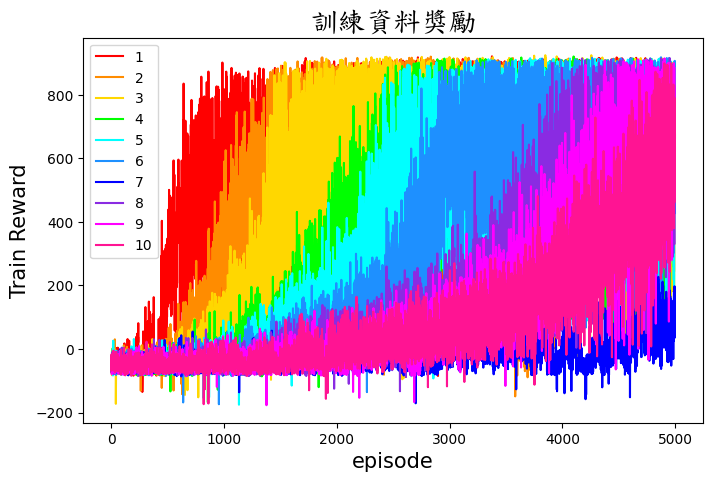

In [ ]:
pic = "訓練資料獎勵"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for i in range(1,11):
  Log = All_Log[i-1]
  plt.plot(Log["TrainReward"],f"{color_list[i-1]}",label=i)
plt.legend()
plt.savefig(folder+f"線性訓練資料獎勵統計.png")

## 畫訓練平均獎勵統計
每50次取一次平均

In [ ]:
# avg=np.ones(len(Log["TrainReward"]))
# for i in range(len(Log["TrainReward"])//50):
#   avg[i*50:i*50+50]=np.mean(Log["TrainReward"][i*50:i*50+50])

In [ ]:
all_avg = []
for j in range(1,11):
  Log = All_Log[j-1]
  pic = "訓練資料獎勵平均"

  avg=np.ones(len(Log["TrainReward"]))
  for i in range(len(Log["TrainReward"])//50):
    avg[i*50:i*50+50]=np.mean(Log["TrainReward"][i*50:i*50+50])
  all_avg.append(avg)

  plt.figure(figsize=(8,5))
  plt.title(f"線性{j}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Train Reward",fontsize=15)
  plt.plot(avg,"b.-")
  plt.savefig(folder+f"{pic}/線性{j}_{pic}.png")
  plt.close()

### 統整

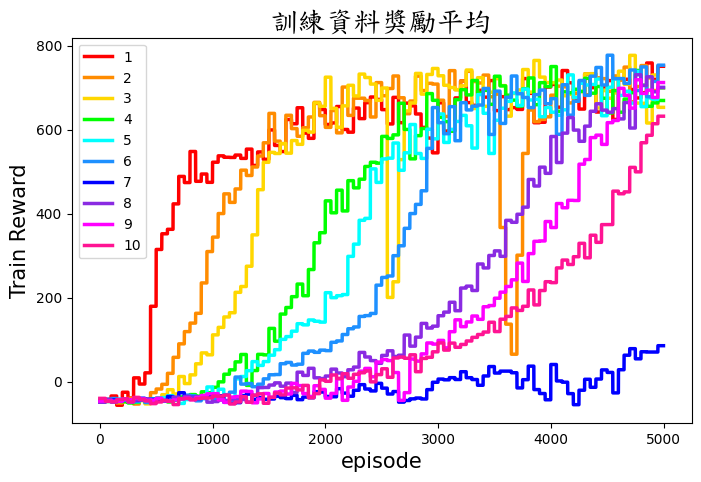

In [ ]:
pic = "訓練資料獎勵平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Train Reward",fontsize=15)
for i in range(1,11):
  plt.plot(all_avg[i-1],f"{color_list[i-1]}",label=i,linewidth=2.5)
plt.legend()
plt.savefig(folder+f"線性訓練資料獎勵平均統計.png")

##計算

訓練資料

In [ ]:
max_, min_, mean_, std_ = [], [], [], []
for i in range(10):
  max_.append(np.max(All_Log[i]["TrainReward"]))
  min_.append(np.min(All_Log[i]["TrainReward"]))
  mean_.append(np.mean(All_Log[i]["TrainReward"]))
  std_.append(np.std(All_Log[i]["TrainReward"]))

In [ ]:
x = ["max_reward", "min_reward", "mean_reward", "std_reward"]
l_ = []
print(f"第 i 項：[{x[0]}, {x[1]}, {x[2]}, {x[3]}]")
for i in range(10):
  l_.append([max_[i], min_[i], mean_[i], std_[i]])
  print(f"第 {i+1} 項：{l_[i]}")

第 i 項：[max_reward, min_reward, mean_reward, std_reward]
第 1 項：[920.489361702124, -135.12307692307704, 556.4253231037043, 273.6937582988173]
第 2 項：[919.5259842519617, -148.9903225806458, 507.2032281161297, 317.4754679965674]
第 3 項：[923.9242424242315, -172.3943661971834, 487.4206150478729, 338.2451133325643]
第 4 項：[920.0093632958734, -167.69215686274558, 396.5570805116614, 338.5728349372481]
第 5 項：[914.602834008083, -175.19834983498362, 355.21243467262343, 336.86214972566984]
第 6 項：[917.4373134328242, -173.72282958199372, 319.9425069194722, 345.95844781185764]
第 7 項：[226.96969696969984, -170.76271777003518, -15.123616358950525, 49.459140595657644]
第 8 項：[914.477992277978, -132.84436860068294, 192.29614368685714, 283.089040703823]
第 9 項：[914.0470588235153, -176.77839721254355, 147.01176477370362, 259.79180938967664]
第 10 項：[898.3925925925789, -173.49797979797998, 100.81436052857636, 193.871661119237]


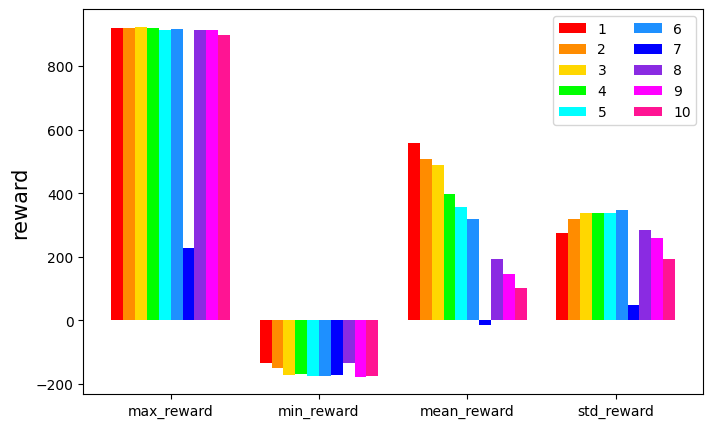

In [ ]:
x_pos=np.arange(len(x))
bar_width=0.08
plt.figure(figsize=(8,5))
plt.ylabel("reward",fontsize=15)
for i in range(10):
  offset=i*bar_width
  h=l_[i]
  plt.bar(x_pos+offset,h,label=f"{i+1}",width=bar_width,color=color_list[i])
plt.xticks(x_pos+bar_width*(10-1)/2,x)
plt.legend(loc="upper right",ncols=2)
plt.savefig(folder+"線性全訓練獎勵最大值、最小值、平均值、標準差.png")
plt.show()

損失

In [ ]:
max_L, min_L, mean_L, std_L = [], [], [], []
for i in range(10):
  max_L.append(np.max(All_Log[i]["Loss"]))
  min_L.append(np.min(All_Log[i]["Loss"]))
  mean_L.append(np.mean(All_Log[i]["Loss"]))
  std_L.append(np.std(All_Log[i]["Loss"]))

In [ ]:
x = ["max_reward", "min_reward", "mean_reward", "std_reward"]
l_L = []
print(f"第 i 項：[{x[0]}, {x[1]}, {x[2]}, {x[3]}]")
for i in range(10):
  l_L.append([max_L[i], min_L[i], mean_L[i], std_L[i]])
  print(f"第 {i+1} 項：{l_L[i]}")

第 i 項：[max_reward, min_reward, mean_reward, std_reward]
第 1 項：[8.380393981933594, 0.0009282176615670323, 1.8961108286178128, 0.7075664190922358]
第 2 項：[39.14833450317383, 0.001982702873647213, 1.8265209983325075, 1.2224628332921916]
第 3 項：[13.734445571899414, 0.001220564590767026, 1.6987794662926219, 0.8400409279431277]
第 4 項：[8.383893966674805, 0.0018332030158489943, 1.4925450227311312, 0.8292098330377438]
第 5 項：[8.88357925415039, 0.0007648624014109373, 1.4397285253946515, 0.8611143076303317]
第 6 項：[13.015975952148438, 0.0014230164233595133, 1.290961598649547, 0.8019173808978755]
第 7 項：[20.626375198364258, 0.0021607428789138794, 0.6146162087994879, 0.35854529787187134]
第 8 項：[8.749141693115234, 0.00210611242800951, 1.0347051235251592, 0.7124316191099141]
第 9 項：[13.578733444213867, 0.001645795302465558, 1.0181938997089621, 0.6232839745728743]
第 10 項：[29.272850036621094, 0.0019712522625923157, 0.8698822679708241, 0.5204658363880191]


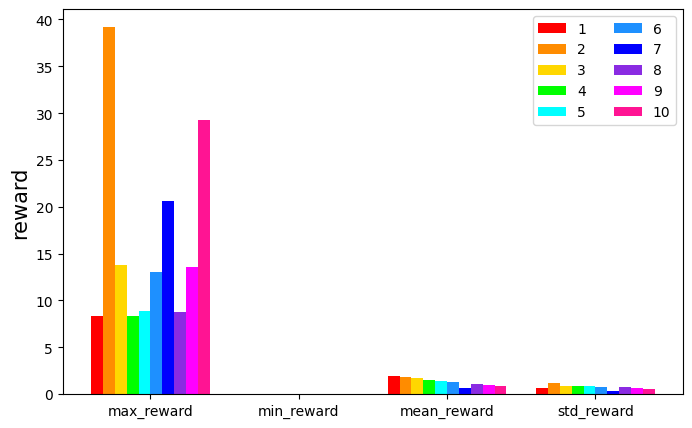

In [ ]:
x_pos=np.arange(len(x))
bar_width=0.08
plt.figure(figsize=(8,5))
plt.ylabel("reward",fontsize=15)
for i in range(10):
  offset=i*bar_width
  h=l_L[i]
  plt.bar(x_pos+offset,h,label=f"{i+1}",width=bar_width,color=color_list[i])
plt.xticks(x_pos+bar_width*(10-1)/2,x)
plt.legend(loc="upper right",ncols=2)
plt.savefig(folder+"線性全訓練損失最大值、最小值、平均值、標準差.png")
plt.show()

測試資料

In [ ]:
max, min, mean, std = [], [], [], []
for i in range(10):
  max.append(np.max(All_Log[i]["TestReward"]))
  min.append(np.min(All_Log[i]["TestReward"]))
  mean.append(np.mean(All_Log[i]["TestReward"]))
  std.append(np.std(All_Log[i]["TestReward"]))

In [ ]:
x = ["max_reward", "min_reward", "mean_reward", "std_reward"]
l = []
print(f"第 i 項：[{x[0]}, {x[1]}, {x[2]}, {x[3]}]")
for i in range(10):
  l.append([max[i], min[i], mean[i], std[i]])
  print(f"第 {i+1} 項：{l[i]}")

第 i 項：[max_reward, min_reward, mean_reward, std_reward]
第 1 項：[922.8893617021247, -94.99999999999903, 554.5929251731615, 310.9475988152138]
第 2 項：[919.5028340080842, -103.09871382636722, 521.5418343429423, 336.5519746211209]
第 3 項：[922.1874999999915, -138.07204968944123, 508.654523089976, 344.8371006516296]
第 4 項：[923.2076923076812, -134.57500000000022, 415.5525810778238, 360.63738877962913]
第 5 項：[913.9034482758495, -133.2000000000001, 400.10916043154003, 345.46752474618893]
第 6 項：[918.1874999999907, -169.37759197324453, 383.8302248063123, 351.2615748368815]
第 7 項：[607.9288702928752, -138.8585365853661, 21.852831054690533, 128.85074734625343]
第 8 項：[919.4664122137343, -141.03011152416383, 266.66229809400687, 308.3288273027967]
第 9 項：[909.6795847750803, -130.74585987261162, 227.87323650894072, 298.55467231977923]
第 10 項：[916.0199261992558, -163.15238095238152, 218.13987776206554, 263.4373286283519]


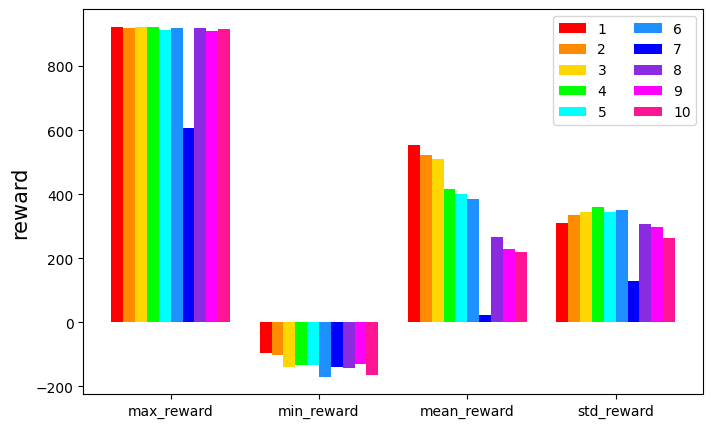

In [ ]:
x_pos=np.arange(len(x))
bar_width=0.08
plt.figure(figsize=(8,5))
plt.ylabel("reward",fontsize=15)
for i in range(10):
  offset=i*bar_width
  h=l[i]
  plt.bar(x_pos+offset,h,label=f"{i+1}",width=bar_width,color=color_list[i])
plt.xticks(x_pos+bar_width*(10-1)/2,x)
plt.legend(loc="upper right",ncols=2)
plt.savefig(folder+"線性全測試獎勵最大值、最小值、平均值、標準差.png")
plt.show()

## 畫訓練資料的損失值

In [ ]:
for i in range(1,11):
  Log = All_Log[i-1]
  pic = "訓練資料損失值"

  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"線性{i}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Loss",fontsize=15)
  plt.plot(Log["Loss"],"b.-")
  plt.savefig(folder+f"{pic}/線性{i}_{pic}.png")
  plt.close()

## 畫訓練資料的損失值

<ipython-input-15-62a76f37ed3f>:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(folder+f"{pic}.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


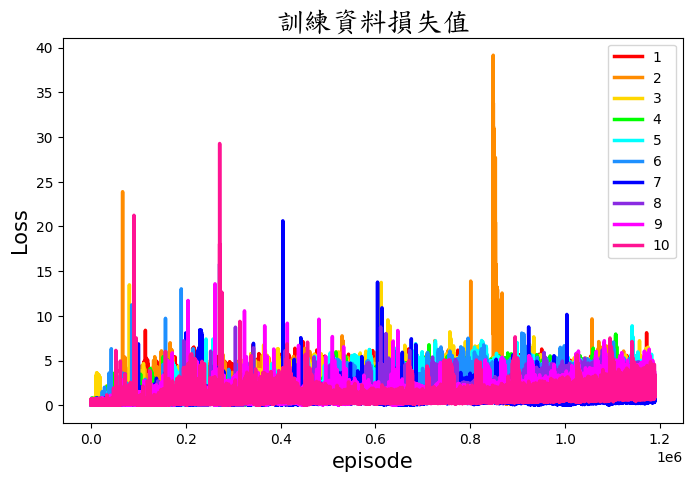

In [ ]:
pic = "訓練資料損失值"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Loss",fontsize=15)
for i in range(1,11):
  plt.plot(All_Log[i-1]["Loss"],f"{color_list[i-1]}",label=i,linewidth=2.5)
plt.legend()
plt.savefig(folder+f"{pic}.png")

## 畫訓練資料的損失平均值

In [ ]:
all_loss_avg = []
for i in range(1,11):
  Log = All_Log[i-1]
  avg=np.ones(len(Log["Loss"]))
  for i in range(len(Log["Loss"])//10000):
    t = i*10000
    avg[t:t+10000]=np.mean(Log["Loss"][t:t+10000])
  all_loss_avg.append(avg)

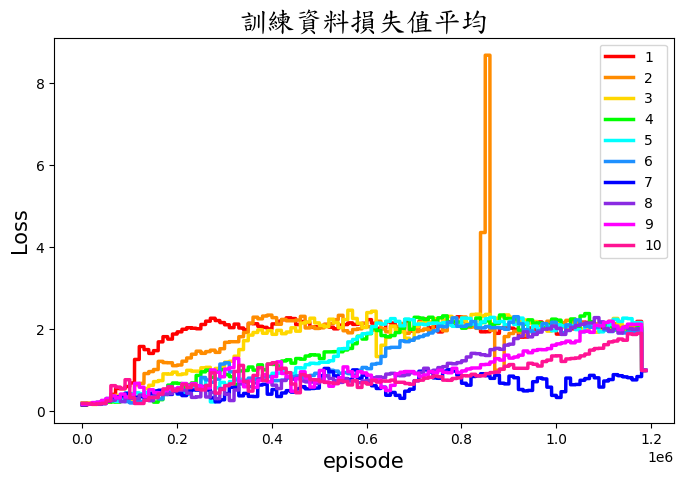

In [ ]:
pic = "訓練資料損失值平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Loss",fontsize=15)
for i in range(1,11):
  plt.plot(all_loss_avg[i-1],f"{color_list[i-1]}",label=i,linewidth=2.5)
plt.legend()
plt.savefig(folder+f"{pic}.png")

## 畫測試資料的獎勵統計

In [ ]:
for i in range(1,11):
  Log = All_Log[i-1]
  pic = "測試資料獎勵"

  plt.figure(figsize=(8,5)) #設定繪圖區大小
  plt.title(f"線性{i}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Test Reward",fontsize=15)
  plt.plot(Log["TestReward"],"r.-")
  plt.savefig(folder+f"{pic}/線性{i}_{pic}.png")
  plt.close()

### 統整

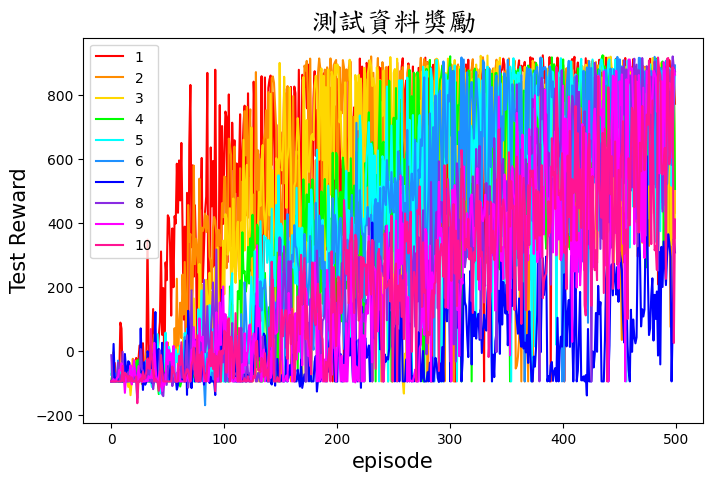

In [ ]:
pic = "測試資料獎勵"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Test Reward",fontsize=15)
for i in range(1,11):
  Log = All_Log[i-1]
  plt.plot(Log["TestReward"],f"{color_list[i-1]}",label=i)
plt.legend()
plt.savefig(folder+f"線性測試資料獎勵統計.png")

##畫測試獎勵平均

In [ ]:
Test_all_avg = []
for j in range(1,11):
  Log = All_Log[j-1]
  pic = "測試資料獎勵平均"

  Test_avg=np.ones(len(Log["TestReward"]))
  for i in range(len(Log["TestReward"])//10):
    Test_avg[i*10:i**10+10]=np.mean(Log["TestReward"][i*10:i*10+10])
  Test_all_avg.append(Test_avg)

  plt.figure(figsize=(8,5))
  plt.title(f"線性{j}的{pic}",fontproperties=font,fontsize=20)
  plt.xlabel("episode",fontsize=15)
  plt.ylabel("Test Reward",fontsize=15)
  plt.plot(Test_avg,"r.-")
  plt.savefig(folder+f"{pic}/線性{j}_{pic}.png")
  plt.close()

### 統整

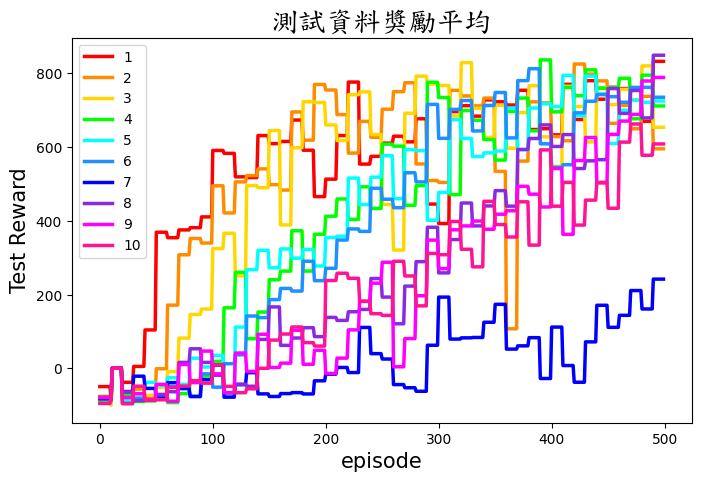

In [ ]:
pic = "測試資料獎勵平均"
plt.figure(figsize=(8,5)) #設定繪圖區大小
plt.title(f"{pic}",fontproperties=font,fontsize=20)
plt.xlabel("episode",fontsize=15)
plt.ylabel("Test Reward",fontsize=15)
for i in range(1,11):
  plt.plot(Test_all_avg[i-1],f"{color_list[i-1]}",label=i,linewidth=2.5)
plt.legend()
plt.savefig(folder+f"線性測試資料獎勵平均統計.png")